# HOMEWORK 1 COMPUTATIONAL PHYSICs

## Importing parameters

In [54]:
import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt

# Parameters
E = 1.5 #meV
epsilon = 5.99 # meV
sigma = 2. # Angstrom
rmax = 150 # Angstrom
h = 0.01
N= rmax/h
r = np.arange(sigma/2, rmax, h)
l = 15


## STEP 1 - Verify the solutions of the SE

In [55]:
h_bar_c = 1.973e6 #mev ångström
m_H = 0.9383e12 #meV / c^2
m_Kr = 83.798 * m_H #meV / c^2
m_r = m_H * m_Kr / (m_H + m_Kr) #meV / c^2
k = E / h_bar_c #1/ångström WAVE number

prefactor = h_bar_c**2 / (2 * m_r) #meV ångström^2

Now we define the potential to use, in this case Lennard-Jones, and then the Numerov algorithm to solve it

In [56]:
# Potential
def V(r):
    V = 4*epsilon * ((sigma/r)**12 - (sigma/r)**6) #meV
    return V

# Numerov
def Numerov(E,h,l,r):
    y = np.zeros(len(r))
    k = np.zeros(len(r))
    # Initialization of values
    y[0] = 0
    b = 1.25 #wtf is b?
    y[1] = np.exp(-(b/r[1])**5)
    k[0] = 1/prefactor * (E -  V(r[0])) - l * (l + 1) / r[0]**2
    k[1] = 1/prefactor * (E - V(r[1])) - l * (l + 1) / r[1]**2
    
    # Algorithm
    for j in range(2, len(r)):
        k[j] = 1/prefactor *(  E - V(r[j]) )- l * (l + 1) / r[j]**2
        y[j] = (1 / (1 + h**2 / 12 * k[j])) * (y[j-1] * (2 - 5 * h**2 / 6 * k[j-1]) - y[j-2] * (1 + h**2 / 12 * k[j-2]))

    psi = np.zeros(len(r))

    for j in range(len(r)):
        psi[j] = y[j] / r[j]
    return psi


At this point we only need to calculate and normalize the wave function and plot it 

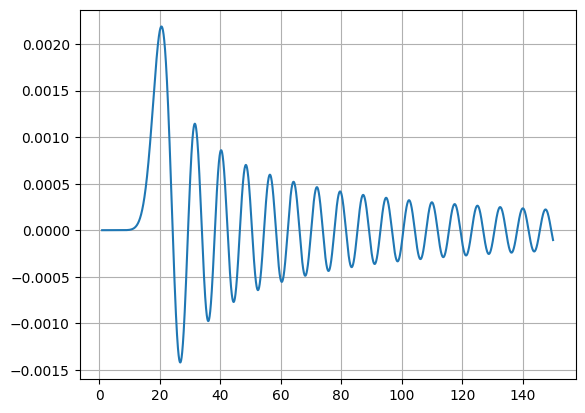

In [57]:
# Normalization
normalizzazione = 0       
n = np.zeros(len(r))

psi = Numerov(E,h,l,r)

for j in range(len(r)):
    n[j] = 4 * np.pi * psi[j]**2 * r[j]**2 *h
    normalizzazione += n[j]

PSI=psi/np.sqrt(normalizzazione)
# Visualization
plt.plot(r,PSI)
plt.grid()
plt.show()

Conclusions on point 1

## STEP 2 - Compute the phase shifts

In [58]:
# Define Bessel functions

def j_1(r):
    return np.sin(r)/(r**2) - np.cos(r)/r
    
def n_1(r):
    return -np.cos(r)/(r**2) - np.sin(r)/r
    
    
def j_0(r):
    return np.sin(r)/r
    
def n_0(r):
    return -np.cos(r)/r
    
def recursive_bessel(l,sl,sl1,r):
    return ((2*l+1)/(r))*sl - sl1
    
    
def Bessel_l(l,r):
    bess_matj = np.zeros((l,len(r)))
    bess_matn = np.zeros((l,len(r)))
    
    for j in range(len(r)):
        bess_matj[0][j] = j_0(r[j])
        bess_matn[0][j] = n_0(r[j])
        bess_matj[1][j] = j_1(r[j])
        bess_matn[1][j] = n_1(r[j])
        
    for w in range(2,l-1):
        for j in range(len(r)):
            bess_matj[w][j] = recursive_bessel(w-1,bess_matj[w-1][j], bess_matj[w-2][j],r[j])
            bess_matn[w][j] = recursive_bessel(w-1,bess_matn[w-1][j], bess_matn[w-2][j],r[j])
            
    return bess_matj, bess_matn



             

            
            
jj, nn = Bessel_l(l,r)       



Now try to use Bessel functions from scipy in order to check if ours are correct

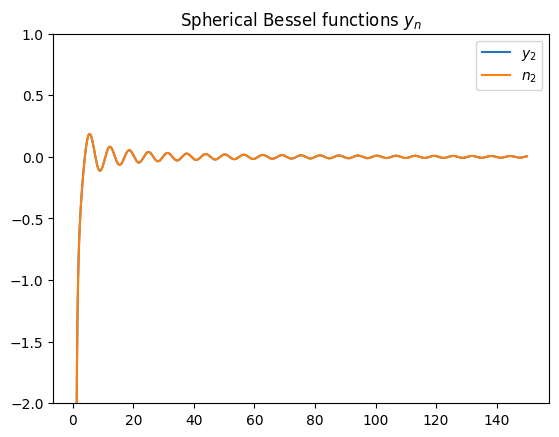

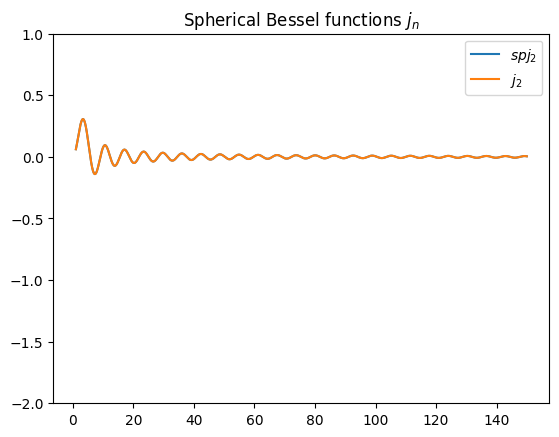

In [59]:
from scipy.special import spherical_jn
from scipy.special import spherical_yn


fig, ax = plt.subplots()
ax.set_ylim(-2.0, 1.0)
ax.set_title(r'Spherical Bessel functions $y_n$')
for n in np.arange(2, 3):
    ax.plot(r, spherical_yn(n, r), label=rf'$y_{n}$')   
for n in np.arange(2, 3):
    ax.plot(r, nn[n][:], label=rf'$n_{n}$')
plt.legend(loc='best')
plt.show()



fig, ax = plt.subplots()
ax.set_ylim(-2.0, 1.0)
ax.set_title(r'Spherical Bessel functions $j_n$')
for n in np.arange(2, 3):
    ax.plot(r, spherical_jn(n, r), label=rf'$spj_{n}$')   
for n in np.arange(2, 3):
    ax.plot(r, jj[n][:], label=rf'$j_{n}$')
plt.legend(loc='best')
plt.show()


Since it turns out everything is fine we compute the phase shifts

In [61]:
# Phase shift
def Phase_shift(j_r1,j_r2,n_r1,n_r2,l,kk):
    tan_delta_l=(kk*j_r2[l]-j_r1[l])/(kk*n_r2[l]-n_r1[l])
    delta_l=np.arctan(tan_delta_l)
    return delta_l

r1=len(r)-500
r2=len(r)-100

kappa=(PSI[r1]*r[r2])/((PSI[r2]*r[r1]))

r1new=len(r)-501
r2new=len(r)-101

kappanew=(PSI[r1new]*r[r2new])/((PSI[r2new]*r[r1new]))



jr1 = jj[0:l-1,r1]
jr2 = jj[0:l-1,r2]
jr1new = jj[0:l-1,r1new]
jr2new = jj[0:l-1,r2new]

nr1 = nn[0:l-1,r1]
nr2 = nn[0:l-1,r2]
nr1new = nn[0:l-1,r1new]
nr2new = nn[0:l-1,r2new]


shift = Phase_shift(jr1,jr2,nr1,nr2,10,kappa)
shift2 = Phase_shift(jr1new,jr2new,nr1new,nr2new,10,kappanew)
print(shift-shift2) 
print("The phase shift is ", shift) 
print("The phase shift2 is ", shift2) 

-0.001388453013810853
The phase shift is  0.7775606097469266
The phase shift2 is  0.7789490627607375
